# Multiple points of view

## Overview

In this tutorial, you will learn how to render a given scene from multiple points of view.

<div class="admonition important alert alert-block alert-info">

🚀 **What will you learn?**

<ul>
  <li>Load Mitsuba objects</li>
  <li>Load a sensor</li>
  <li>Render a scene for a specific sensor</li>
</ul>

</div>

## Step 1 - Import Mitsuba

Assuming it is already installed on you system, you can import Mitsuba 3 in your Python code like this:

In [1]:
import mitsuba as mi
import drjit as dr

In [2]:
mi.set_variant('cuda_ad_rgb')

## Step 2 - Loading a scene


In [3]:
scene = mi.load_dict({
    'type' : 'scene',
    'integrator' : { 
        'type' : 'path' 
    },
    'light' : { 
        'type' : 'constant' 
    },
    'sensor' : {
        'type' : 'perspective'
    },
    'teapot' : {
        'type' : 'ply',
        'filename': '../../scenes/meshes/teapot.ply',
        'to_world' : mi.ScalarTransform4f.translate([0, 0, -1.5]),
        'bsdf' : {
            'type' : 'diffuse',
            'reflectance' : {
                'type' : 'rgb',
                'value' : [0.1, 0.2, 0.3]
            },
        }
    }
})

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/path.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/constant.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/uniform.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/perspective.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/hdrfilm.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/gaussian.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/independent.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/ply.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/diffuse.so" ..

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/srgb.so" ..

2022-04-04 16:52:29 DEBUG main [PLYMesh] Loading mesh from "teapot.ply" ..

2022-04-04 16:52:29 DEBUG main [PLYMesh] "teapot.ply": read 2256 faces, 1177 vertices (54 KiB in 3ms)

2022-04-04 16:52:29 DEBUG main [PLYMesh] "teapot.ply": computed vertex normals (took 1ms)

2022-04-04 16:52:29 INFO main [Scene] Building scene in OptiX ..

2022-04-04 16:52:29 DEBUG main [scene_optix.inl:67] Initialize Optix configuration (index=2)..

2022-04-04 16:52:29 INFO main [Scene] OptiX ready. (took 46ms)

The scene we have just loaded is a simple teapot under constant lightning conditions, we will be rendering it from mulitple points of view by moving  around it in a circular motion.

Note that the scene description specifies a sensor, this is just a placeholder it could be omitted entirely.

## Step 3 - Generating sensors

Mitsuba provides a high level `mi.Sensor` abstraction that can 

In [4]:
def generate_sensor(phi, theta):
    r = 10
    return mi.load_dict({
        'type': 'perspective',
        'fov_axis': 'smaller',
        'near_clip': 0.001,
        'far_clip': 100.0,
        'focus_distance': 1000,
        'fov': 39.3077,
        'to_world': mi.ScalarTransform4f.look_at(
                        origin=[r * dr.sin(theta) * dr.cos(phi), 
                                r * dr.sin(theta) * dr.sin(phi), 
                                r * dr.cos(theta)],
                        target=[0, 0, 0],
                        up=[0, 0, 1]),
        'sampler': {
            'type': 'independent',
            'sample_count': 256
        },
        'film': {
            'type': 'hdrfilm',
            'width': 256,
            'height': 256,
            'rfilter':  {
                'type': 'tent',
            },
            'pixel_format': 'rgb'
        }
    })

## Step 4 - Rendering from a specific sensor

The `mi.render` function can take quite a few aditional arguments. We have already seen that we can specifiy the number of samples per pixel with the keyword argument `spp`, but we can also specify a sensor with the keyword argument `sensor`.


In [5]:
N = 5
lim = 55
sensors = [generate_sensor(phi, theta) for phi, theta in zip(
    dr.linspace(mi.Float, dr.deg_to_rad(lim), dr.Pi - dr.deg_to_rad(lim), N),
    dr.Pi - dr.linspace(mi.Float, dr.deg_to_rad(lim), dr.Pi - dr.deg_to_rad(lim), N)
)]
images = [mi.render(scene, spp=256, sensor=sensor) for sensor in sensors]

2022-04-04 16:52:29 DEBUG main [PluginManager] Loading plugin "plugins/tent.so" ..

2022-04-04 16:52:29 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples)

2022-04-04 16:52:29 INFO main [SamplingIntegrator] Computation graph recorded. (took 6ms)

2022-04-04 16:52:30 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples)

2022-04-04 16:52:30 INFO main [SamplingIntegrator] Computation graph recorded. (took 5ms)

2022-04-04 16:52:30 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples)

2022-04-04 16:52:30 INFO main [SamplingIntegrator] Computation graph recorded. (took 6ms)

2022-04-04 16:52:31 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples)

2022-04-04 16:52:31 INFO main [SamplingIntegrator] Computation graph recorded. (took 6ms)

2022-04-04 16:52:31 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples)

2022-04-04 16:52:31 INFO main [SamplingIntegrator] Computation graph recorded. (took 5ms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


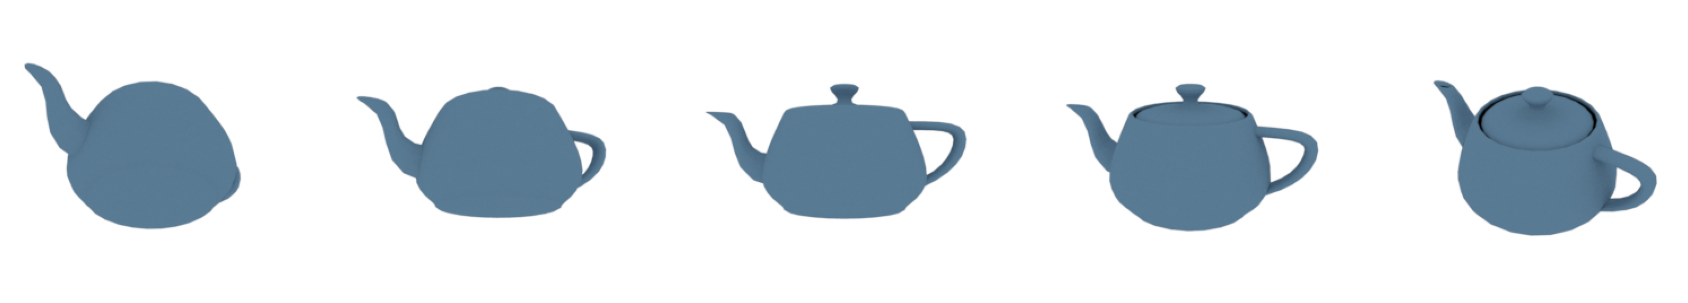

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

for i in range(N):
    plt.subplot(1, N, i + 1)
    plt.axis('off')
    plt.imshow(images[i] ** (1.0 / 2.2));

### *Reference API*

- [<code>mitsuba.set_variant</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.set_variant)
- [<code>mitsuba.load_file</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.load_file)
- [<code>mitsuba.render</code>](https://mitsuba2.readthedocs.io/en/latest/generated/python_api.html#mitsuba.python.util.render)
- [<code>mitsuba.Bitmap.write</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.Bitmap.write)